In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu',
                       input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [8]:
model.add(layers.Flatten())# преобразование 3-х мерного тензора в вектор
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [22]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape(60000,28,28,1)
train_images = train_images.astype('float32')/255

test_images = test_images.reshape(10000,28,28,1)
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer= 'rmsprop',
             loss= 'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=5,batch_size=64)


Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.1674 - accuracy: 0.9481
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0459 - accuracy: 0.9862
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0320 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0235 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0188 - accuracy: 0.9942


In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 1ms/step - loss: 0.0272 - accuracy: 0.9914


0.9914000034332275

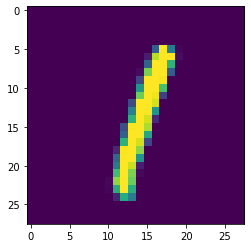

In [43]:
# import matplotlib as plt
# plt.pyplot.imshow(test_images[5])